In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pqr_agrs_100_30k = pd.read_csv('../../lp_csv/mLP6.csv', header = 2)

In [3]:
pqr_agrs_100_30k

,wall_time,step,run/total_reward,run/length,lp/lp_total_reward,lp/lp_length,lp/count_used_lp,loss/value_loss,loss/policy_loss,loss/agent_loss,loss/entropy,total_loss
0,1.606548e+09,0,0.0,100.0,0.0,0.0,0.0,0.000035,1.683771,1.683806,1.786514,1.683806
1,1.606548e+09,100,0.0,100.0,0.0,0.0,0.0,0.000138,1.300956,1.301094,0.889545,1.301094
2,1.606548e+09,200,0.0,100.0,0.0,0.0,0.0,0.006360,1.132769,1.139130,1.264546,1.139130
3,1.606548e+09,300,0.0,100.0,0.0,0.0,0.0,0.005423,1.207054,1.212477,1.173598,1.212477
4,1.606548e+09,400,0.0,100.0,0.0,0.0,0.0,0.004298,1.079950,1.084248,1.144908,1.084248
...,...,...,...,...,...,...,...,...,...,...,...,...
43748,1.606535e+09,59867,1.0,19.0,0.0,0.0,1.0,0.005598,0.624013,0.629611,0.610020,0.629611
43749,1.606535e+09,59886,1.0,19.0,0.0,0.0,1.0,0.005893,0.647012,0.652905,0.626109,0.652905
43750,1.606535e+09,59905,1.0,40.0,0.0,0.0,1.0,0.011750,0.527163,0.538913,0.551577,0.538913
43751,1.606535e+09,59945,1.0,23.0,0.0,0.0,1.0,0.019009,0.586540,0.605549,0.614004,0.605549


In [4]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs = df_av_at_step
df_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.400000,71.280000,0.000000,0.000000
1,17.0,0.199800,85.654360,0.080000,412.419200
2,22.0,0.467067,67.733792,0.253613,1166.559449
3,26.0,0.349950,75.824560,0.223553,1037.725935
4,28.0,0.380080,73.550579,0.172014,803.241742
...,...,...,...,...,...
30978,59992.0,0.999298,30.329029,0.000235,50.017266
30979,59994.0,0.999299,30.332368,0.000234,49.922905
30980,59996.0,0.999301,30.321713,0.000234,49.879913
30981,59998.0,0.999302,30.303089,0.000233,49.953695


In [5]:
pqr_no_agrs_100_30k = pd.read_csv('../../lp_csv/mNoLP6.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        
# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_agrs = df_av_at_step
df_no_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.520000,63.080000,0.000000,0.000000
1,19.0,0.760240,40.016960,0.115200,1061.683200
2,23.0,0.840320,35.669292,0.076723,586.847636
3,26.0,0.880360,34.999966,0.057485,392.625238
4,27.0,0.904384,34.196770,0.045942,297.383812
...,...,...,...,...,...
30635,59992.0,0.999963,30.566454,0.000029,52.986395
30636,59994.0,0.999963,30.609278,0.000028,53.797488
30637,59998.0,0.999963,30.613056,0.000028,53.697135
30638,59999.0,0.999963,30.639803,0.000028,53.947553


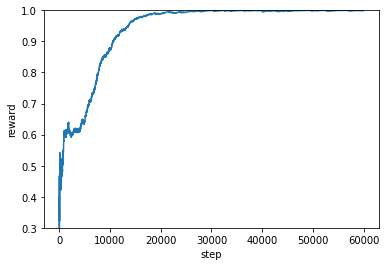

In [6]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_agrs)

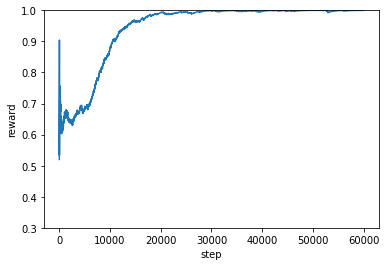

In [7]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_no_agrs)

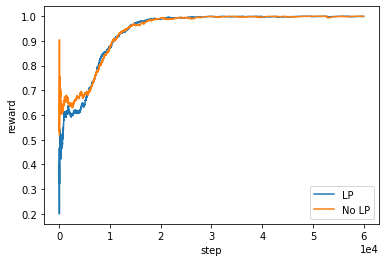

In [8]:
fig, axs = plt.subplots(ncols=1)
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)
axs.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

axs.legend(['LP','No LP'], loc=4)

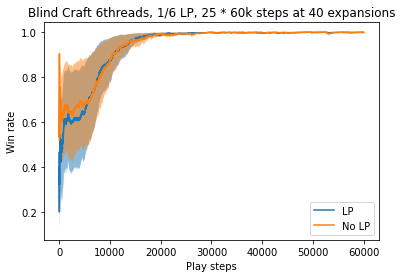

In [9]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)

axs.fill_between(x=df_agrs["step"], y1=df_agrs["reward"] + df_agrs["reward_se"], 
                 y2=df_agrs["reward"] - df_agrs["reward_se"], alpha=.5)
axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"], 
                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5)
axs.set(xlabel='Play steps', ylabel='Win rate')
plt.title('Blind Craft 6threads, 1/6 LP, 25 * 60k steps at 40 expansions')

axs.legend(['LP', 'No LP'], loc=4)

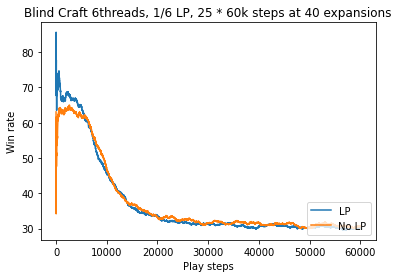

In [11]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
sns.lineplot(x="step", y="length", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_no_agrs,ax=axs, ci=99)

#axs.fill_between(x=df_agrs["step"], y1=df_agrs["length"] + df_agrs["length_se"], 
#          y2=df_agrs["reward"] - df_agrs["length_se"], alpha=.5)
#axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["length"] + df_no_agrs["length_se"], 
#                 y2=df_no_agrs["length"] - df_no_agrs["length_se"], alpha=.5)
axs.set(xlabel='Play steps', ylabel='Win rate')
plt.title('Blind Craft 6threads, 1/6 LP, 25 * 60k steps at 40 expansions')

axs.legend(['LP', 'No LP'], loc=4)